# DS1 Tree Ensembles Assignment/Competition

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

## Data Overview

### Train Features

In [3]:
train = pd.read_csv('train_features.csv')

In [4]:
train.head(2)

,id,member_id,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,disbursement_method
0,43373,NaN,12000,12000,36 months,16.02%,422.01,C,C5,Driver,4 years,MORTGAGE,81000.0,NaN,NaN,debt_consolidation,Debt consolidation,280xx,NC,12.76,0,Dec-2005,1,48.0,NaN,7,0,4912,23.5%,15,w,0,48.0,Individual,NaN,NaN,0,0,174783,1,2,0,4,13.0,33668,82.0,2,5,2962,63.0,20900,1,1,2,9,24969.0,588.0,89.3,0,0,145.0,23,1,1,1,8.0,NaN,1.0,NaN,2,2,2,2,2,9,4,5,2,7,0.0,0,0,2,92.9,100.0,0,0,206618,38580,5500,40863,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash
1,24414,NaN,6300,6300,36 months,14.07%,215.54,C,C3,GMP Lead,4 years,RENT,39000.0,NaN,NaN,debt_consolidation,Debt consolidation,920xx,CA,21.42,0,Mar-2012,1,NaN,NaN,10,0,11876,59.4%,12,w,0,NaN,Individual,NaN,NaN,0,0,31046,0,1,0,2,14.0,19170,83.0,3,8,5153,72.0,20000,1,0,1,10,3105.0,6877.0,59.3,0,0,17.0,72,8,8,0,8.0,NaN,6.0,NaN,0,6,7,7,8,2,9,10,7,10,0.0,0,0,3,100.0,42.9,0,0,43140,31046,16900,23140,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash


### Train Labels

In [5]:
train_labels = pd.read_csv('train_labels.csv')

In [6]:
train_labels.head(2)

,id,charged_off
0,43373,0
1,24414,0


In [7]:
train_labels.charged_off.value_counts()

0    32191
1     5554
Name: charged_off, dtype: int64

In [8]:
train_labels.shape

(37745, 2)

### Test Features

In [9]:
test = pd.read_csv('test_features.csv')

In [10]:
test.shape

(9437, 103)

### Sample Submission DF

In [11]:
sample_submission = pd.read_csv('sample_submission.csv')

In [12]:
sample_submission.tail()

,id,charged_off
9432,45702,0.5
9433,25727,0.5
9434,45966,0.5
9435,30441,0.5
9436,30058,0.5


In [13]:
sample_submission.shape

(9437, 2)

## Majority Class Baseline

In [14]:
# setting a y_pred array
# same length as test set & filled with train_label mode
y_pred = np.full(test.shape[0],
                train_labels.charged_off.mode()[0])

In [15]:
len(test.id.values)

9437

In [16]:
majority_baseline = sample_submission.copy() 
majority_baseline['charged_off'] = y_pred

In [17]:
majority_baseline.tail(5)

,id,charged_off
9432,45702,0
9433,25727,0
9434,45966,0
9435,30441,0
9436,30058,0


In [18]:
majority_baseline.shape

(9437, 2)

In [19]:
#majority_baseline.to_csv('majority_baseline.csv', index=False)

## First Round

### Cleaning Train DF

#### Dropping Unnecesary Columns

In [20]:
train.shape

(37745, 103)

In [21]:
train.isna().sum()

id                                         0
member_id                              37745
loan_amnt                                  0
funded_amnt                                0
term                                       0
int_rate                                   0
installment                                0
grade                                      0
sub_grade                                  0
emp_title                               3565
emp_length                              3277
home_ownership                             0
annual_inc                                 0
url                                    37745
desc                                   37745
purpose                                    0
title                                      0
zip_code                                   0
addr_state                                 0
dti                                       92
delinq_2yrs                                0
earliest_cr_line                           0
inq_last_6

In [22]:
train1 = train.copy()

In [23]:
train1 = train1.drop(columns='id') # id is randomly assigned
train1 = train1.drop(columns=['member_id', 'url', 'desc']) # null columns
train1 = train1.drop(columns='title') # Duplicative of 'purpose' column
train1 = train1.drop(columns='grade') # Duplicative of 'sub_grade' column

#### Feature Engineering

In [24]:
# Transforming 'sub-grade' from "A1" to "G5" -->> 1.1 to 7.5
# 'sub_grade' is a more granular version of the dropped 'grade' column
# We'll wrangle it not using the arbitrary ordinal encoding 
# because there is a natural order set in this column that we want to present
# This will help our model have a better fit
def wrangle_sub_grade(x):
    first_digit = ord(x[0]) - 64 # first digit is a letter from A to G -> ord('A') == 65, ord('B') == 66, and so on
    second_digit = int(x[1]) # second digit turned from string to integer
    return first_digit + second_digit / 10

train1['sub_grade'] = train1['sub_grade'].apply(wrangle_sub_grade)

In [25]:
train1.sub_grade.head()

0    3.5
1    3.3
2    1.3
3    2.1
4    4.5
Name: sub_grade, dtype: float64

In [26]:
# Convert percentages from strings to floats
train1['int_rate'] = train1['int_rate'].str.strip('%').astype(float)
train1['revol_util'] = train1['revol_util'].str.strip('%').astype(float)

In [27]:
# Transform earliest_cr_line to an integer: how many days it's been open
train1['earliest_cr_line'] = pd.to_datetime(train1['earliest_cr_line'], infer_datetime_format=True) # `infer_datetime_format=True` makes it go faster
train1['earliest_cr_line'] = pd.Timestamp.today() - train1['earliest_cr_line'] # (difference from today to when credit line was opened) how long the credit line have been opened
train1['earliest_cr_line'] = train1['earliest_cr_line'].dt.days # .dt accessor is very useful to get 'days' or 'months'... 
# if you get the 'months' (which are from 1 to 12) you can categorically or ordinally encode that

In [28]:
train1['earliest_cr_line']

0         4857
1         2575
2         6897
3         5891
4         6348
5         2788
6         3122
7         5132
8        10427
9         5649
10        7689
11        9089
12        4005
13        4614
14        5344
15        6075
16        5983
17        2026
18        6348
19       13957
20        5283
21       12406
22        7049
23        5283
24        4280
25       11127
26        6683
27        2330
28       11827
29        2149
30       11127
31        4341
32        2788
33        8632
34        1753
35        6927
36        7110
37        3518
38        5832
39        6256
40        6228
41        8266
42        5160
43       10915
44        2026
45        6866
46        7171
47        6836
48        5283
49       12162
50        6532
51        2727
52        3153
53       10945
54        9543
55        5191
56        4583
57        4005
58       11157
59        8388
60        4127
61        3549
62       10124
63        5922
64        4310
65        4218
66        

In [29]:
# Create features for three employee titles: teacher, manager, owner
# most common job titles
# some titles are repeated with lower or upper case
train1['emp_title'] = train1['emp_title'].str.lower()
train1['emp_title_teacher'] = train1['emp_title'].str.contains('teacher', na=False)
train1['emp_title_manager'] = train1['emp_title'].str.contains('manager', na=False)
train1['emp_title_owner']   = train1['emp_title'].str.contains('owner', na=False)

In [30]:
# Dropping categorical features with high cardinality
# High cardinality means that the column contains a large percentage of totally unique values. 
# Low cardinality means that the column contains a lot of "repeats" in its data range.
train1 = train1.drop(columns=['emp_title', 'zip_code'])

In [31]:
# Transform features with many nulls to binary flags
many_nulls = ['sec_app_mths_since_last_major_derog',
              'sec_app_revol_util',
              'sec_app_earliest_cr_line',
              'sec_app_mort_acc',
              'dti_joint',
              'sec_app_collections_12_mths_ex_med',
              'sec_app_chargeoff_within_12_mths',
              'sec_app_num_rev_accts',
              'sec_app_open_act_il',
              'sec_app_open_acc',
              'revol_bal_joint',
              'annual_inc_joint',
              'sec_app_inq_last_6mths',
              'mths_since_last_record',
              'mths_since_recent_bc_dlq',
              'mths_since_last_major_derog',
              'mths_since_recent_revol_delinq',
              'mths_since_last_delinq',
              'il_util',
              'emp_length',
              'mths_since_recent_inq',
              'mo_sin_old_il_acct',
              'mths_since_rcnt_il',
              'num_tl_120dpd_2m',
              'bc_util',
              'percent_bc_gt_75',
              'bc_open_to_buy',
              'mths_since_recent_bc']

for col in many_nulls:
        train1[col] = train1[col].isnull()

In [32]:
# For features with few nulls, do mean imputation
for col in train1:
    if train1[col].isnull().sum() > 0:
        train1[col] = train1[col].fillna(train1[col].mean())

In [33]:
train1.head(2)

,loan_amnt,funded_amnt,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,disbursement_method,emp_title_teacher,emp_title_manager,emp_title_owner
0,12000,12000,36 months,16.02,422.01,3.5,False,MORTGAGE,81000.0,debt_consolidation,NC,12.76,0,4857,1,False,True,7,0,4912,23.5,15,w,0,False,Individual,True,True,0,0,174783,1,2,0,4,False,33668,False,2,5,2962,63.0,20900,1,1,2,9,24969.0,False,False,0,0,False,23,1,1,1,False,True,False,True,2,2,2,2,2,9,4,5,2,7,False,0,0,2,92.9,False,0,0,206618,38580,5500,40863,True,True,True,True,True,True,True,True,True,True,True,Cash,False,False,False
1,6300,6300,36 months,14.07,215.54,3.3,False,RENT,39000.0,debt_consolidation,CA,21.42,0,2575,1,True,True,10,0,11876,59.4,12,w,0,True,Individual,True,True,0,0,31046,0,1,0,2,False,19170,False,3,8,5153,72.0,20000,1,0,1,10,3105.0,False,False,0,0,False,72,8,8,0,False,True,False,True,0,6,7,7,8,2,9,10,7,10,False,0,0,3,100.0,False,0,0,43140,31046,16900,23140,True,True,True,True,True,True,True,True,True,True,True,Cash,False,False,False


In [34]:
train1.isnull().sum().sum()

0

In [35]:
train1.shape

(37745, 98)

### Test DF - Cleaning 

#### Applying Same Wrangling as Train DF

In [36]:
def wrangle(X):
    X = X.copy()
    
    # Drop some columns
    X = X.drop(columns='id')  # id is random
    X = X.drop(columns=['member_id', 'url', 'desc'])  # All null
    X = X.drop(columns='title')  # Duplicative of purpose
    X = X.drop(columns='grade')  # Duplicative of sub_grade
    
    # Transform sub_grade from "A1" - "G5" to 1.1 - 7.5
    def wrangle_sub_grade(x):
        first_digit = ord(x[0]) - 64
        second_digit = int(x[1])
        return first_digit + second_digit/10
    
    X['sub_grade'] = X['sub_grade'].apply(wrangle_sub_grade)

    # Convert percentages from strings to floats
    X['int_rate'] = X['int_rate'].str.strip('%').astype(float)
    X['revol_util'] = X['revol_util'].str.strip('%').astype(float)
        
    # Transform earliest_cr_line to an integer: how many days it's been open
    X['earliest_cr_line'] = pd.to_datetime(X['earliest_cr_line'], infer_datetime_format=True) # `infer_datetime_format=True` makes it go faster
    X['earliest_cr_line'] = pd.Timestamp.today() - X['earliest_cr_line'] # (difference from today to when credit line was opened) how long the credit line have been opened
    X['earliest_cr_line'] = X['earliest_cr_line'].dt.days # .dt accessor is very useful to get 'days' or 'months'... 
    # if you get the 'months' (which are from 1 to 12) you can categorically or ordinally encode that
    
    # Create features for three employee titles: teacher, manager, owner
    # most common job titles
    # some titles are repeated with lower or upper case
    X['emp_title'] = X['emp_title'].str.lower()
    X['emp_title_teacher'] = X['emp_title'].str.contains('teacher', na=False)
    X['emp_title_manager'] = X['emp_title'].str.contains('manager', na=False)
    X['emp_title_owner']   = X['emp_title'].str.contains('owner', na=False)
    
    # Drop categoricals with high cardinality
    X = X.drop(columns=['emp_title', 'zip_code'])
    
    # Transform features with many nulls to binary flags
    many_nulls = ['sec_app_mths_since_last_major_derog',
                  'sec_app_revol_util',
                  'sec_app_earliest_cr_line',
                  'sec_app_mort_acc',
                  'dti_joint',
                  'sec_app_collections_12_mths_ex_med',
                  'sec_app_chargeoff_within_12_mths',
                  'sec_app_num_rev_accts',
                  'sec_app_open_act_il',
                  'sec_app_open_acc',
                  'revol_bal_joint',
                  'annual_inc_joint',
                  'sec_app_inq_last_6mths',
                  'mths_since_last_record',
                  'mths_since_recent_bc_dlq',
                  'mths_since_last_major_derog',
                  'mths_since_recent_revol_delinq',
                  'mths_since_last_delinq',
                  'il_util',
                  'emp_length',
                  'mths_since_recent_inq',
                  'mo_sin_old_il_acct',
                  'mths_since_rcnt_il',
                  'num_tl_120dpd_2m',
                  'bc_util',
                  'percent_bc_gt_75',
                  'bc_open_to_buy',
                  'mths_since_recent_bc']

    for col in many_nulls:
        X[col] = X[col].isnull()
    
    # For features with few nulls, do mean imputation
    for col in X:
        if X[col].isnull().sum() > 0:
            X[col] = X[col].fillna(X[col].mean())
    
    # Return the wrangled dataframe
    return X


X_test  = wrangle(test)
X_test.shape

(9437, 98)

In [37]:
X_test.head(2)

,loan_amnt,funded_amnt,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,disbursement_method,emp_title_teacher,emp_title_manager,emp_title_owner
0,18500,18500,60 months,25.82,551.93,5.4,False,MORTGAGE,87000.0,debt_consolidation,OH,22.07,0,4310,3,True,False,20,1,5504,16.9,37,w,0,True,Individual,True,True,0,200,212122,2,5,4,6,False,105151,False,2,3,2991,66.0,32500,6,3,12,10,10606.0,False,False,0,0,False,55,7,1,2,False,True,False,True,0,4,5,8,9,20,14,15,5,20,False,0,0,6,100.0,False,1,0,250214,110655,22100,113624,True,True,True,True,True,True,True,True,True,True,True,Cash,False,False,False
1,36000,36000,60 months,12.61,811.95,3.1,False,MORTGAGE,165000.0,other,MI,13.39,0,9666,0,False,True,12,0,21833,42.6,21,w,0,True,Individual,True,True,0,0,42059,2,2,1,2,False,20226,False,1,3,5880,48.0,51200,1,0,1,5,3505.0,False,False,0,0,False,131,4,4,0,False,False,False,False,0,3,7,6,6,6,10,14,7,12,False,0,0,2,85.7,False,0,0,87584,42059,33000,36384,True,True,True,True,True,True,True,True,True,True,True,Cash,False,False,False


In [38]:
# Setting 'train1' equal to X_train & 'train_labels' equal to y_train
X = train1.copy()
y = train_labels.copy()
y = y['charged_off']

In [39]:
X.shape, y.shape

((37745, 98), (37745,))

Now X (and X) have no nulls

In [40]:
null_counts = X.isnull().sum()
all(null_counts == 0)

True

And no high cardinality categoricals (only 50 or less since we have 50 states)

In [41]:
cardinality = X.select_dtypes(exclude='number').nunique()
all(cardinality <= 50)

True

#### Splitting Data into Test and Validate

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_validate, y_train, y_validate = train_test_split(X, y, test_size=0.3, random_state=42)

In [44]:
X_train.shape, X_validate.shape, y_train.shape, y_validate.shape

((26421, 98), (11324, 98), (26421,), (11324,))

## Round 1

### Decision Tree

In [54]:
import category_encoders as ce
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

In [43]:
# Any leftover categorical features we apply arbitrary ordinal encoding -- 
# but not good for Logistic Regression!
# Also using class_weight='balanced' recomended when using metric/scoring 'roc_auc' 
# to improve ability to rank
pipe = make_pipeline(
    ce.OrdinalEncoder(), 
    DecisionTreeClassifier(max_depth=5, class_weight='balanced')
)

# when using sklearn's cross validation functions like in this case 'cross_val_score' or
# 'grid search cv', you want to use scoring equal to 'roc_auc' - DON'T USE DEFAULT scoring
# otherwise will give DECEPTIVE RESULTS!
# 'roc_auc' evaluates the rank to sort the predictive probabilities
cross_val_score(pipe, X_train, y_train, cv=5, scoring='roc_auc')

array([0.70297128, 0.70044849, 0.69332495, 0.68879982, 0.68917646])

In [50]:
pipe = make_pipeline(
    ce.OrdinalEncoder(), 
    DecisionTreeClassifier(max_depth=5, class_weight='balanced')
)

param_grid = {
    'decisiontreeclassifier__min_samples_leaf': [0.05]
}

grid = GridSearchCV(pipe, param_grid=param_grid, cv=3, verbose=4)

In [51]:
grid.fit(X_train, y_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] decisiontreeclassifier__min_samples_leaf=0.05 ...................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  decisiontreeclassifier__min_samples_leaf=0.05, score=0.6607629427792916, total=   0.5s
[CV] decisiontreeclassifier__min_samples_leaf=0.05 ...................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV]  decisiontreeclassifier__min_samples_leaf=0.05, score=0.6433518791870103, total=   0.4s
[CV] decisiontreeclassifier__min_samples_leaf=0.05 ...................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.3s remaining:    0.0s


[CV]  decisiontreeclassifier__min_samples_leaf=0.05, score=0.570292982057688, total=   0.4s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.1s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('ordinalencoder', OrdinalEncoder(cols=None, drop_invariant=False, handle_unknown='impute',
        impute_missing=True, mapping=None, return_df=True, verbose=0)), ('decisiontreeclassifier', DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=5,
            max_feature...      min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'decisiontreeclassifier__min_samples_leaf': [0.05]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=4)

In [52]:
grid.score(X_validate, y_validate)

0.6017308371600141

### Decision Tree
Improves ROC AUC compared to Decision Tree

In [44]:
from sklearn.ensemble import RandomForestClassifier

pipe = make_pipeline(
    ce.OrdinalEncoder(),
    RandomForestClassifier(
        n_estimators=100,
    class_weight='balanced',
    min_samples_leaf=0.005, # not going below half of percentage of the population -- min_samples_leaf = 1 can lead to overfitting
    oob_score=True,
    n_jobs=-1 ) # using all cores
)
        
cross_val_score(pipe, X_train, y_train, cv=5, scoring='roc_auc', verbose=10)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  ................................................................
[CV] ........................ , score=0.728957023672549, total=   7.7s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.8s remaining:    0.0s


[CV] ....................... , score=0.7292859761279016, total=   5.0s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   12.9s remaining:    0.0s


[CV] ....................... , score=0.7233379442324475, total=   4.4s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   17.3s remaining:    0.0s


[CV] ....................... , score=0.7267127924348818, total=   4.4s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   21.9s remaining:    0.0s


[CV] ....................... , score=0.7363387152296752, total=   4.6s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   26.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   26.6s finished


array([0.72895702, 0.72928598, 0.72333794, 0.72671279, 0.73633872])

### Random Forest

In [71]:
pipe = make_pipeline(
    ce.OrdinalEncoder(),
    RandomForestClassifier(
    class_weight='balanced',
    min_samples_leaf=0.005, 
    oob_score=True,
    n_jobs=-1) 
)

param_grid = {
    'randomforestclassifier__n_estimators': [300, 400]
}

grid = GridSearchCV(pipe, param_grid=param_grid, cv=3, verbose=4)

In [72]:
grid.fit(X_train, y_train)

Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV] randomforestclassifier__n_estimators=300 ........................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  randomforestclassifier__n_estimators=300, score=0.6805177111716622, total=  10.0s
[CV] randomforestclassifier__n_estimators=300 ........................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.9s remaining:    0.0s


[CV]  randomforestclassifier__n_estimators=300, score=0.6801407970932213, total=   9.4s
[CV] randomforestclassifier__n_estimators=300 ........................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   21.2s remaining:    0.0s


[CV]  randomforestclassifier__n_estimators=300, score=0.6916874858051328, total=   9.9s
[CV] randomforestclassifier__n_estimators=400 ........................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   32.0s remaining:    0.0s


[CV]  randomforestclassifier__n_estimators=400, score=0.677338782924614, total=  13.5s
[CV] randomforestclassifier__n_estimators=400 ........................
[CV]  randomforestclassifier__n_estimators=400, score=0.6768479618485296, total=  12.2s
[CV] randomforestclassifier__n_estimators=400 ........................
[CV]  randomforestclassifier__n_estimators=400, score=0.6920281626163979, total=  12.2s


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  1.2min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('ordinalencoder', OrdinalEncoder(cols=None, drop_invariant=False, handle_unknown='impute',
        impute_missing=True, mapping=None, return_df=True, verbose=0)), ('randomforestclassifier', RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_dept...ors='warn', n_jobs=-1, oob_score=True,
            random_state=None, verbose=0, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'randomforestclassifier__n_estimators': [300, 400]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=4)

In [73]:
grid.score(X_validate, y_validate)

0.674408336276934

In [74]:
y_predict = grid.predict(X_test)
y_predict

array([1, 1, 0, ..., 1, 0, 1], dtype=int64)

In [75]:
round1_submission = sample_submission.copy() 
round1_submission['charged_off'] = y_predict

In [76]:
round1_submission.shape

(9437, 2)

In [77]:
#round1_submission.to_csv('round1_submission.csv', index=False)

### Gradient Boosting

**This is overfitting a lot!!!** -- Kaggle's submission score using Gradient Boosting was 0.5276 (much lower than 0.68443 using Random Forest above)

Does it have to do with tweaking hyperparameters?

In [88]:
pipe = make_pipeline(
    ce.OrdinalEncoder(),
    GradientBoostingClassifier(
    min_samples_leaf=0.005) 
)

param_grid = {
    'gradientboostingclassifier__n_estimators': [500, 800]
}

grid = GridSearchCV(pipe, param_grid=param_grid, cv=3, verbose=4)

In [89]:
grid.fit(X_train, y_train)

Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV] gradientboostingclassifier__n_estimators=500 ....................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  gradientboostingclassifier__n_estimators=500, score=0.851158038147139, total= 1.0min
[CV] gradientboostingclassifier__n_estimators=500 ....................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.0min remaining:    0.0s


[CV]  gradientboostingclassifier__n_estimators=500, score=0.8534120585897581, total=  46.5s
[CV] gradientboostingclassifier__n_estimators=500 ....................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  1.8min remaining:    0.0s


[CV]  gradientboostingclassifier__n_estimators=500, score=0.8557801498977969, total=  48.9s
[CV] gradientboostingclassifier__n_estimators=800 ....................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  2.6min remaining:    0.0s


[CV]  gradientboostingclassifier__n_estimators=800, score=0.8521798365122616, total= 1.3min
[CV] gradientboostingclassifier__n_estimators=800 ....................
[CV]  gradientboostingclassifier__n_estimators=800, score=0.8509140456455092, total= 1.2min
[CV] gradientboostingclassifier__n_estimators=800 ....................
[CV]  gradientboostingclassifier__n_estimators=800, score=0.853849647967295, total= 1.5min


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  6.7min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('ordinalencoder', OrdinalEncoder(cols=None, drop_invariant=False, handle_unknown='impute',
        impute_missing=True, mapping=None, return_df=True, verbose=0)), ('gradientboostingclassifier', GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, l...    subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'gradientboostingclassifier__n_estimators': [500, 800]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=4)

In [81]:
grid.score(X_validate, y_validate)

0.8524373013069587

In [82]:
y_predict = grid.predict(X_test)
y_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [85]:
round1_gradientboost = sample_submission.copy() 
round1_gradientboost['charged_off'] = y_predict

In [86]:
round1_gradientboost.shape

(9437, 2)

In [87]:
#round1_gradientboost.to_csv('round1_gradientboost.csv', index=False)

### Out-of-Bag Estimated Score
Out-of-bag is a faster way to get an estimated score with Random Forest, using the parameter `oob_score=True`

In [45]:
from sklearn.metrics import roc_auc_score

In [46]:
%%time
pipe.fit(X_train, y_train)
y_pred_proba = pipe.named_steps['randomforestclassifier'].oob_decision_function_[:,1]
print('ROC ACU, Out-of-Bag estimate:', roc_auc_score(y_train, y_pred_proba))

ROC ACU, Out-of-Bag estimate: 0.7266202794991414
Wall time: 5.24 s


You can explore hyperparameter values

In [47]:
%%time

max_depths = list(range(2, 12, 2)) + [None]

for max_depth in max_depths:
    pipe = make_pipeline(
        ce.OrdinalEncoder(),
        RandomForestClassifier(
            n_estimators=100,
            class_weight='balanced',
            max_depth=max_depth,
            oob_score=True,
            n_jobs=-1)
    )
    
    pipe.fit(X_train, y_train)
    y_pred_proba=pipe.named_steps['randomforestclassifier'].oob_decision_function_[:,1]
    print('Max Depth:', max_depth)
    print('ROC AUC, OOB:', roc_auc_score(y_train, y_pred_proba))

Max Depth: 2
ROC AUC, OOB: 0.6983513577085421
Max Depth: 4
ROC AUC, OOB: 0.7151815437402029
Max Depth: 6
ROC AUC, OOB: 0.7222974475349448
Max Depth: 8
ROC AUC, OOB: 0.7251287488265344
Max Depth: 10
ROC AUC, OOB: 0.72157656910236
Max Depth: None
ROC AUC, OOB: 0.7071790240747389
Wall time: 30.9 s


## Feature Importances

We can look at feature importances. [But remember:](https://blog.datadive.net/selecting-good-features-part-iii-random-forests/)

>Firstly, feature selection based on impurity reduction is biased towards preferring variables with more categories.
>
>Secondly, when the dataset has two (or more) correlated features, then from the point of view of the model, any of these correlated features can be used as the predictor, with no concrete preference of one over the others.

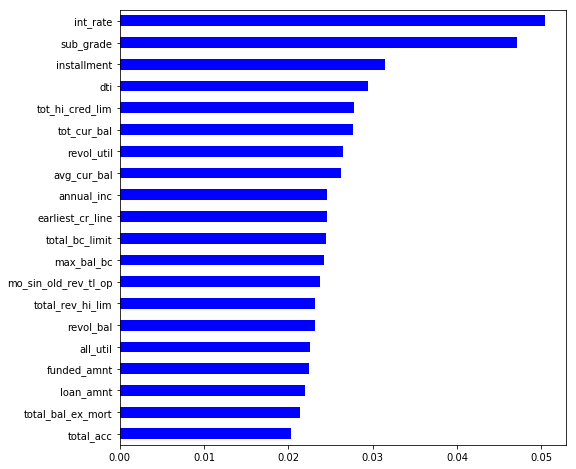

In [48]:
def show_feature_importances(
    pipe, X, y, estimator_name='randomforestclassifier',
    n=20, figsize=(8, 8)):
    
    #pipe must not change dimensions of X dataframe
    pipe.fit(X, y)
    importances = pd.Series(
        pipe.named_steps[estimator_name].feature_importances_,
        X.columns)
    
    top_n = importances.sort_values(ascending=False)[:n]
    
    plt.figure(figsize=figsize)
    top_n.sort_values().plot.barh(color='blue')
    
show_feature_importances(pipe, X_train, y_train)

## Drop Column Importances / "Ablation Study"

`sub_grade` and `int_rate` are highly correlated. If we drop one of those features, the model uses the other more, so the score remains similar.

In [49]:
cross_val_score(pipe, X_train.drop(columns='sub_grade'),
                y_train, cv=5, scoring='roc_auc')

array([0.71890744, 0.72215817, 0.71847301, 0.71806736, 0.72169187])

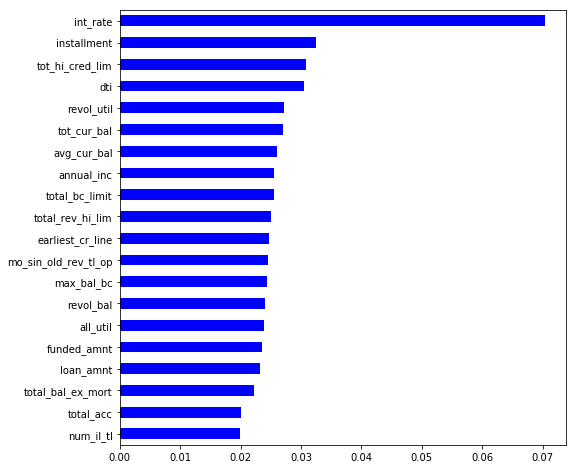

In [50]:
show_feature_importances(pipe, X_train.drop(columns='sub_grade'), y_train)

But if we drop both features, then the score decreases:

In [51]:
cross_val_score(pipe, X_train.drop(columns=['sub_grade', 'int_rate']),
               y_train, cv=5, scoring='roc_auc')

array([0.69645733, 0.70056747, 0.70846591, 0.70032134, 0.70100802])

For more information, see [Beware Default Random Forest Importances](https://explained.ai/rf-importance/index.html).

## Permutation Importance

Permutation Importance is a compromise between Feature Importance based on impurity reduction (which is the fastest) and Drop Column Importance (which is the "best.")

[The ELI5 library documentation explains,](https://eli5.readthedocs.io/en/latest/blackbox/permutation_importance.html)

> Importance can be measured by looking at how much the score (accuracy, F1, R^2, etc. - any score we’re interested in) decreases when a feature is not available.
>
> To do that one can remove feature from the dataset, re-train the estimator and check the score. But it requires re-training an estimator for each feature, which can be computationally intensive. ...
>
>To avoid re-training the estimator we can remove a feature only from the test part of the dataset, and compute score without using this feature. It doesn’t work as-is, because estimators expect feature to be present. So instead of removing a feature we can replace it with random noise - feature column is still there, but it no longer contains useful information. This method works if noise is drawn from the same distribution as original feature values (as otherwise estimator may fail). The simplest way to get such noise is to shuffle values for a feature, i.e. use other examples’ feature values - this is how permutation importance is computed.
>
>The method is most suitable for computing feature importances when a number of columns (features) is not huge; it can be resource-intensive otherwise.

For more documentation on using this library, see:
- [eli5.sklearn.PermutationImportance](https://eli5.readthedocs.io/en/latest/autodocs/sklearn.html#eli5.sklearn.permutation_importance.PermutationImportance)
- [eli5.show_weights](https://eli5.readthedocs.io/en/latest/autodocs/eli5.html#eli5.show_weights)

In [52]:
%%time
import eli5
from eli5.sklearn import PermutationImportance

encoder = ce.OrdinalEncoder
X_train_trasformed = encoder.fit_transform(X_train)

mode = RandomForestClassifier(
    n_estimators='balanced',
min_samples_leaf=0.005,
n_jobs=-1)

model.fit(X_train_trasformed, y_train)
permuter = PermutationImportance(model, scoring='roc_auc',
                                n_iter=1, cv='prefit')
permuter.fit(X_train_transformed, y_train)

TypeError: fit_transform() missing 1 required positional argument: 'X'

We can use Permutation Importance weights for feature selection. For example, we can remove features with zero weight. The model trains faster and the score does not decrease.

In [53]:
subset = X_train.columns[permuter.feature_importances_ > 0]
cross_val_score(pipe, X_train[subset], y_train,
                cv=5, scoring='roc_auc', verbose=10)

NameError: name 'permuter' is not defined